# 原始数据结构

In [1]:
import os

In [2]:
import mne

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

## 1、加载数据

In [5]:
sample_data_file = "Sample Data\sample_audvis_raw.fif"

In [6]:
print(sample_data_file)

Sample Data\sample_audvis_raw.fif


In [7]:
raw = mne.io.read_raw_fif(sample_data_file, preload=True)

Opening raw data file Sample Data\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


## 2、查询原始数据的属性

In [8]:
n_time_samps = raw.n_times

In [9]:
time_secs = raw.times

In [10]:
ch_names = raw.ch_names

In [11]:
n_chan = len(ch_names)

In [12]:
print('The sample data object has {} time samples and {} channels'''.format(n_time_samps, n_chan))

The sample data object has 166800 time samples and 376 channels


In [13]:
print('The last time sample is at {} seconds.'.format(time_secs[-1]))

The last time sample is at 277.7136813300495 seconds.


In [14]:
print('The first few channel name are {}.'.format(','.join(ch_names[:3])))

The first few channel name are MEG 0113,MEG 0112,MEG 0111.


In [15]:
print('bad channels:', raw.info['bads'])

bad channels: ['MEG 2443', 'EEG 053']


In [16]:
print(raw.info['sfreq'], 'Hz')

600.614990234375 Hz


In [17]:
print(raw.info['description'], '\n')

acquisition (megacq) VectorView system at NMR-MGH 



In [18]:
print(raw.info)

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


## 3、数据索引

In [19]:
print(raw.time_as_index(20))

[12012]


In [20]:
print(raw.time_as_index([20, 30, 40]),'\n')

[12012 18018 24024] 



In [21]:
print(np.diff(raw.time_as_index([1, 2, 3])))

[601 600]


## 4、修改原始对象

### 4.1 选择、删除和重新排序通道

In [22]:
eeg_and_eog  = raw.pick_types(meg=False, eeg=True, eog=True)

In [23]:
print(len(raw.ch_names), '->', len(eeg_and_eog.ch_names))

60 -> 60


In [24]:
raw_temp = raw.copy()

In [25]:
print('Number of channels is raw_temp:',len(raw_temp.ch_names), end='-> drop two ->')

Number of channels is raw_temp: 60-> drop two ->

In [26]:
raw_temp.drop_channels(['EEG 037', 'EEG 059'])

<Raw | sample_audvis_raw.fif, 58 x 166800 (277.7 s), ~76.9 MB, data loaded>

In [27]:
print(len(raw_temp.ch_names), end=' -> pick three ->' )

58 -> pick three ->

In [28]:
raw_temp.pick_channels(['EEG 018', 'EEG 017', 'EOG 061'])

<Raw | sample_audvis_raw.fif, 3 x 166800 (277.7 s), ~6.8 MB, data loaded>

In [29]:
print(len(raw_temp.ch_names))

3


In [30]:
channel_names = ['EOG 061', 'EEG 003', 'EEG 002', 'EEG 001']

In [31]:
eog_and_frontal_eeg = raw.copy().reorder_channels(channel_names)

In [32]:
print(eog_and_frontal_eeg.ch_names)

['EOG 061', 'EEG 003', 'EEG 002', 'EEG 001']


### 4.2、改变通道的名字和类型

In [33]:
raw.rename_channels({'EOG 061':'blink detector'})

<Raw | sample_audvis_raw.fif, 60 x 166800 (277.7 s), ~79.4 MB, data loaded>

In [34]:
print(raw.ch_names[-3:])

['EEG 059', 'EEG 060', 'blink detector']


In [35]:
channel_renaming_dict = { name:name.replace(' ','-') for name in raw.ch_names }

In [36]:
raw.rename_channels(channel_renaming_dict)

<Raw | sample_audvis_raw.fif, 60 x 166800 (277.7 s), ~79.4 MB, data loaded>

In [37]:
print(raw.ch_names[-3:])

['EEG-059', 'EEG-060', 'blink-detector']


In [38]:
raw.set_channel_types({'EEG-060' : 'eog'})

<Raw | sample_audvis_raw.fif, 60 x 166800 (277.7 s), ~79.4 MB, data loaded>

In [39]:
print(raw.copy().pick_types(meg=False, eog=True).ch_names)

['EEG-060', 'blink-detector']


### 4.3、时域选择

In [40]:
raw_selection = raw.copy().crop(tmin=10,tmax=12.5)

In [41]:
print(raw_selection)

<Raw | sample_audvis_raw.fif, 60 x 1503 (2.5 s), ~3.8 MB, data loaded>


In [42]:
raw_selection1 = raw.copy().crop(tmin=30,tmax=30.1)

In [43]:
raw_selection2 = raw.copy().crop(tmin=40,tmax=41.1)

In [44]:
raw_selection3 = raw.copy().crop(tmin=50,tmax=51.3)

In [45]:
raw_selection1.append([raw_selection,raw_selection3])

In [46]:
print(raw_selection1.times.min(), raw_selection1.times.max())

0.0 3.9059964172464827


### 4.4、从原始数据提取数据

In [47]:
sampling_freq = raw.info['sfreq']

In [48]:
start_stop_seconds = np.array([11,13])

In [49]:
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)

In [50]:
channel_index = 0

In [51]:
raw_selection = raw[channel_index, start_sample:stop_sample]

In [52]:
print(raw_selection)

(array([[-1.64169314e-05, -1.41867068e-05, -5.57556161e-07, ...,
         1.31335451e-05,  6.69067393e-06, -1.85852054e-07]]), array([10.99872648, 11.00039144, 11.0020564 , ..., 12.9933487 ,
       12.99501366, 12.99667862]))


In [53]:
x = raw_selection[1]

In [54]:
y = raw_selection[0].T

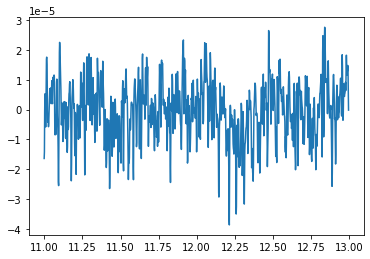

In [55]:
plt.plot(x,y)

In [56]:
 channel_names = ['EEG-060', 'EEG-061']

In [57]:
two_meg_chans = raw[channel_names, start_sample:stop_sample]

In [58]:
y_offset = np.array([5e-11,0])

In [59]:
x = two_meg_chans[1]

In [60]:
y = two_meg_chans[0].T + y_offset

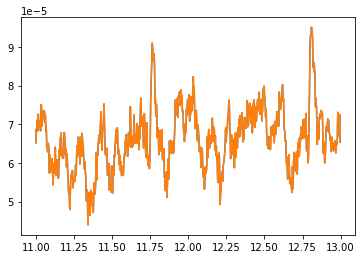

In [61]:
lines = plt.plot(x,y)

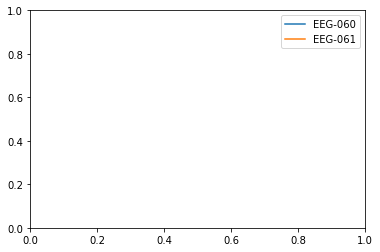

In [62]:
plt.legend(lines, channel_names)

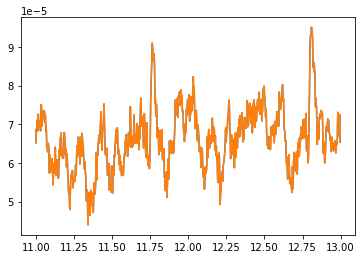

In [63]:
plt.plot(x, y)

### 4.5、导出和保存原始数据

In [64]:
data = raw.get_data()

In [65]:
np.save(file='my_data.npy',arr=data)

In [66]:
sampling_freq = raw.info['sfreq']

In [67]:
start_end_secs = np.array([10, 13])

In [68]:
start_sample, stop_sample = (start_end_secs * sampling_freq).astype(int)

In [69]:
df = raw.to_data_frame(picks=['eeg'], start = start_sample, stop = stop_sample)

In [70]:
print(df.head())

    time    EEG-001    EEG-002    EEG-003     EEG-004    EEG-005    EEG-006  \
0  10000  -6.380921  38.478851  44.163942  178.125610  68.323000  12.145385   
1  10001  -7.867737  36.128997  41.207612  177.663696  67.666048  15.347900   
2  10003  -3.097534  35.894012  41.328279  173.910645  64.022951  21.148681   
3  10005   6.133118  37.245177  45.370607  174.314819  60.857637  24.351196   
4  10006  10.097962  38.478851  46.516939  178.067871  61.454866  32.931518   

     EEG-007    EEG-008    EEG-009  ...    EEG-049    EEG-050    EEG-051  \
0   0.562775  74.821746 -10.079834  ...  44.001343  75.135499  63.266908   
1   1.313141  75.587036 -12.476868  ...  42.486145  73.286928  62.052460   
2   8.066437  76.293457 -11.554932  ...  41.819458  72.452089  61.127167   
3  18.258911  76.999878  -6.883789  ...  42.243713  72.153932  61.011506   
4  30.577424  77.882904  -2.581421  ...  42.728576  72.452089  61.878968   

     EEG-052    EEG-054    EEG-055    EEG-056    EEG-057    EEG-058 